# Understanding Why People Vote

In [1]:
gerber = read.csv('data/gerber.csv')

In [2]:
str(gerber)

'data.frame':	344084 obs. of  8 variables:
 $ sex      : int  0 1 1 1 0 1 0 0 1 0 ...
 $ yob      : int  1941 1947 1982 1950 1951 1959 1956 1981 1968 1967 ...
 $ voting   : int  0 0 1 1 1 1 1 0 0 0 ...
 $ hawthorne: int  0 0 1 1 1 0 0 0 0 0 ...
 $ civicduty: int  1 1 0 0 0 0 0 0 0 0 ...
 $ neighbors: int  0 0 0 0 0 0 0 0 0 0 ...
 $ self     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ control  : int  0 0 0 0 0 1 1 1 1 1 ...


In [3]:
summary(gerber)

      sex              yob           voting         hawthorne    
 Min.   :0.0000   Min.   :1900   Min.   :0.0000   Min.   :0.000  
 1st Qu.:0.0000   1st Qu.:1947   1st Qu.:0.0000   1st Qu.:0.000  
 Median :0.0000   Median :1956   Median :0.0000   Median :0.000  
 Mean   :0.4993   Mean   :1956   Mean   :0.3159   Mean   :0.111  
 3rd Qu.:1.0000   3rd Qu.:1965   3rd Qu.:1.0000   3rd Qu.:0.000  
 Max.   :1.0000   Max.   :1986   Max.   :1.0000   Max.   :1.000  
   civicduty        neighbors          self           control      
 Min.   :0.0000   Min.   :0.000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.000   Median :0.0000   Median :1.0000  
 Mean   :0.1111   Mean   :0.111   Mean   :0.1111   Mean   :0.5558  
 3rd Qu.:0.0000   3rd Qu.:0.000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.000   Max.   :1.0000   Max.   :1.0000  

In [11]:
t = table(gerber$voting, gerber$civicduty)
t[2,2]/(t[1,2] + t[2,2])

[1] 0.3145377

In [14]:
summary(gerber$voting[gerber$civicduty==1])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3145  1.0000  1.0000 

In [15]:
summary(gerber$voting[gerber$hawthorne==1])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3224  1.0000  1.0000 

In [16]:
summary(gerber$voting[gerber$self==1])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3452  1.0000  1.0000 

In [17]:
summary(gerber$voting[gerber$neighbors==1])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3779  1.0000  1.0000 

In [20]:
model_lr_all = lm(voting~civicduty+hawthorne+self+neighbors,
                 data=gerber)
summary(model_lr_all)


Call:
lm(formula = voting ~ civicduty + hawthorne + self + neighbors, 
    data = gerber)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3780 -0.3145 -0.2966  0.6549  0.7034 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.296638   0.001061 279.525  < 2e-16 ***
civicduty   0.017899   0.002600   6.884 5.85e-12 ***
hawthorne   0.025736   0.002601   9.896  < 2e-16 ***
self        0.048513   0.002600  18.657  < 2e-16 ***
neighbors   0.081310   0.002601  31.263  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4641 on 344079 degrees of freedom
Multiple R-squared:  0.003394,	Adjusted R-squared:  0.003383 
F-statistic:   293 on 4 and 344079 DF,  p-value: < 2.2e-16


In [22]:
pred_all = predict(model_lr_all)

In [27]:
# ACC with threshold 0.3
t = table(gerber$voting, pred_all>=0.3)
sum(diag(t))/sum(t)

[1] 0.5419578

In [28]:
# ACC with threshold 0.5
t = table(gerber$voting, pred_all>=0.5)
sum(diag(t))/sum(t)

[1] 0.6841004

In [29]:
summary(pred_all)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2966  0.2966  0.2966  0.3159  0.3224  0.3779 

In [33]:
# Baseline acc
1- mean(gerber$voting)

[1] 0.6841004

## Calculate AUC:

In [34]:
library(ROCR)
pred_all = predict(model_lr_all)


Loading required package: gplots
Warning message:
: package ‘gplots’ was built under R version 3.2.4
Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [35]:
head(pred_all)

1         2         3         4         5         6 
0.3145377 0.3145377 0.3223746 0.3223746 0.3223746 0.2966383

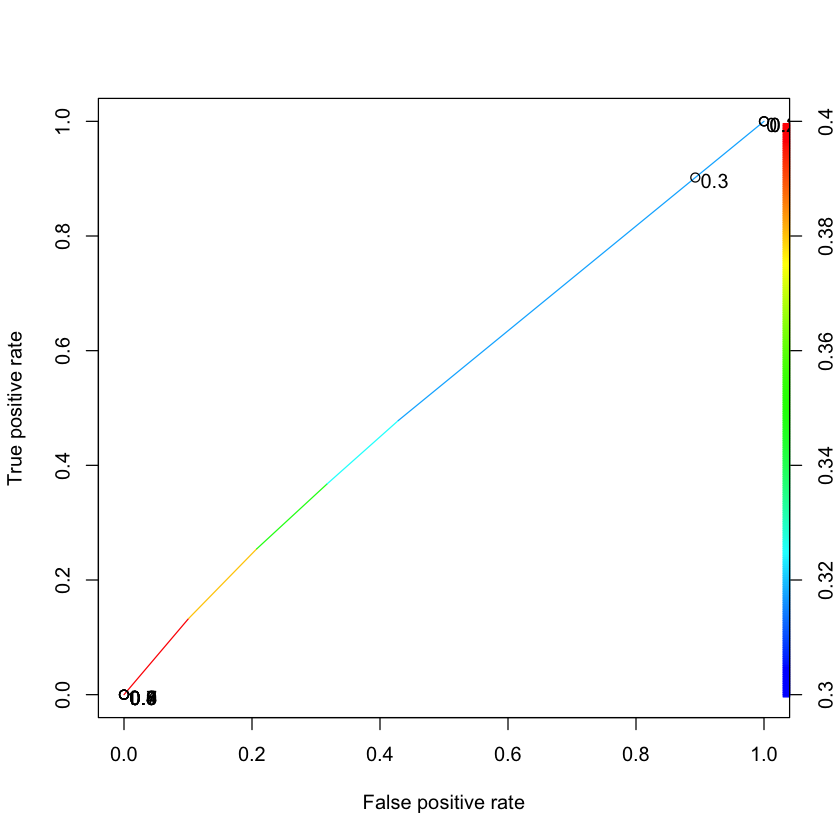

In [41]:
pred = prediction(pred_all, gerber$voting)
perf = performance(pred, 'tpr', 'fpr')
plot(perf,
     colorize=TRUE,
     print.cutoffs.at=seq(0, 1, 0.1),
     text.adj=c(-0.2,0.7))

In [42]:
as.numeric(performance(pred, "auc")@y.values)

[1] 0.5308461

## Even though all of the variables are significant, this is a weak predictive model.

# Let's try Trees now:

In [46]:
library(rpart)
library(rpart.plot)

In [45]:
CARTmodel = rpart(voting ~ civicduty + hawthorne + self + neighbors, data=gerber)

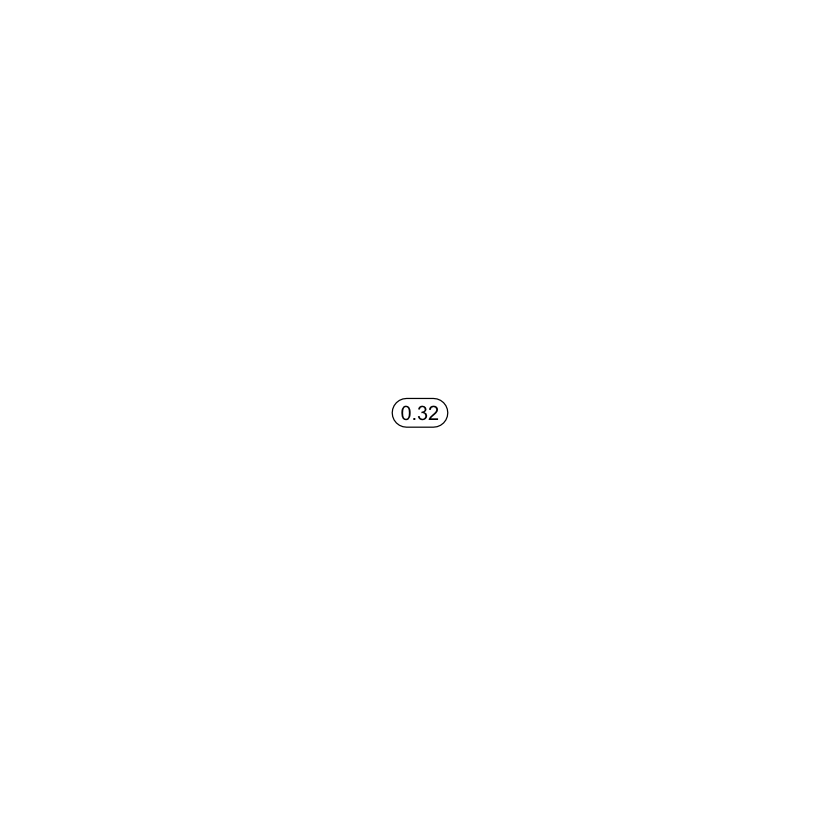

In [47]:
prp(CARTmodel)

In [48]:
CARTmodel2 = rpart(voting ~ civicduty + hawthorne + self + neighbors, data=gerber, cp=0.0)

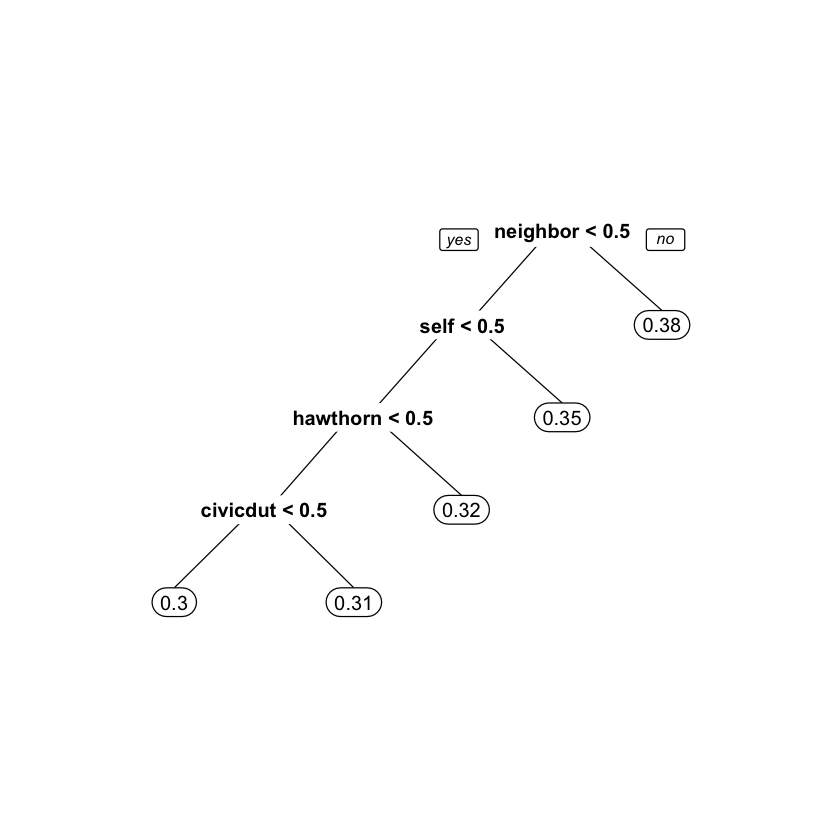

In [49]:
prp(CARTmodel2)

In [50]:
CARTmodel3 = rpart(voting ~ civicduty + hawthorne + self + neighbors + sex, data=gerber, cp=0.0)

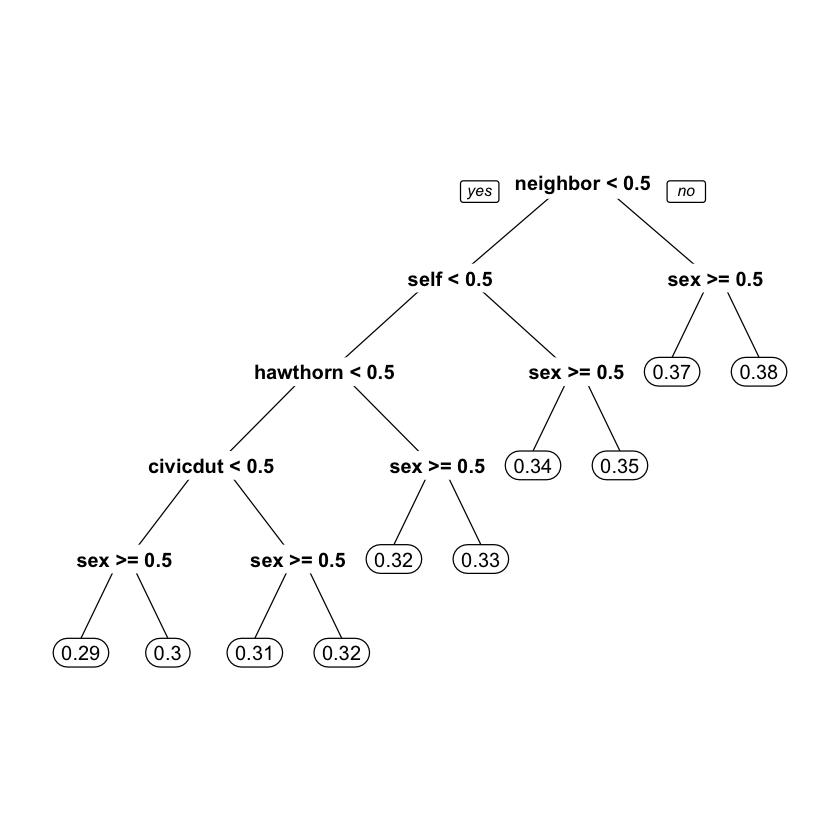

In [51]:
prp(CARTmodel3)

In [53]:
CARTmodel_control_1 = rpart(voting ~ control, data=gerber, cp=0.0)
CARTmodel_control_2 = rpart(voting ~ control + sex, data=gerber, cp=0.0)

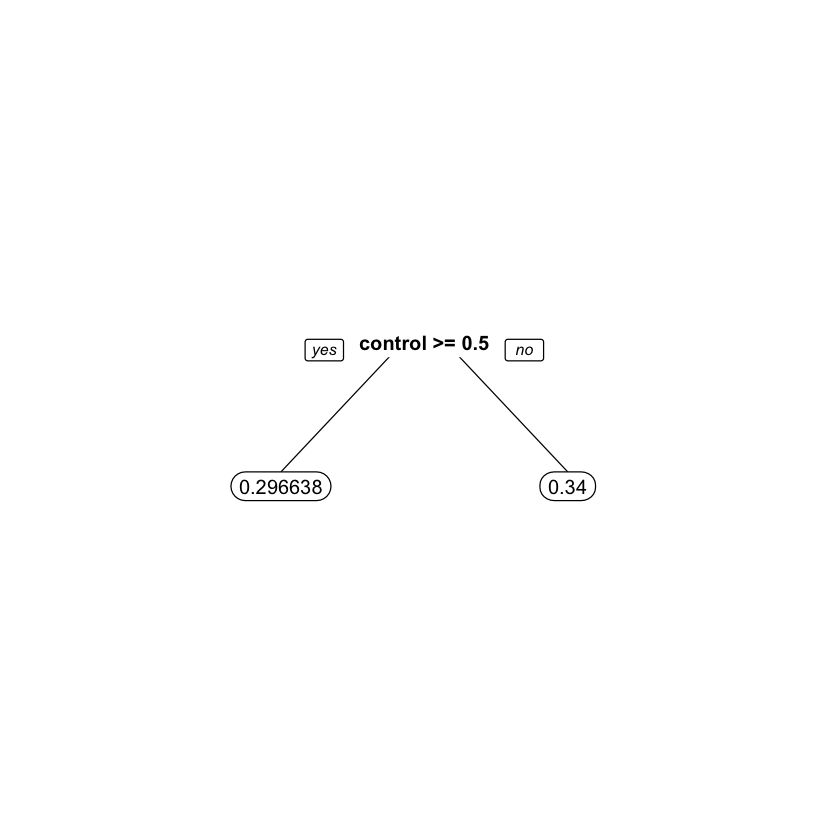

In [55]:
prp(CARTmodel_control_1, digits=6)

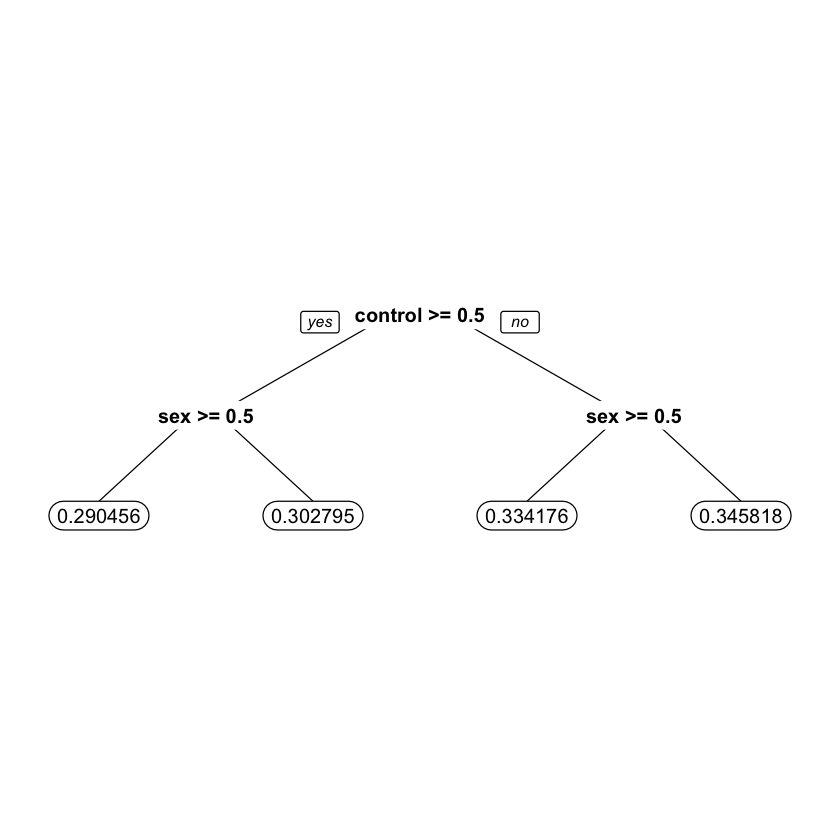

In [56]:
prp(CARTmodel_control_2, digits=6)

In [61]:
model_lr_2 = glm(voting~control+sex,
                 family="binomial",
                 data=gerber)
summary(model_lr_2)


Call:
glm(formula = voting ~ control + sex, family = "binomial", data = gerber)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9220  -0.9012  -0.8290   1.4564   1.5717  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.635538   0.006511 -97.616  < 2e-16 ***
control     -0.200142   0.007364 -27.179  < 2e-16 ***
sex         -0.055791   0.007343  -7.597 3.02e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 429238  on 344083  degrees of freedom
Residual deviance: 428443  on 344081  degrees of freedom
AIC: 428449

Number of Fisher Scoring iterations: 4


In [62]:
Possibilities = data.frame(sex=c(0,0,1,1),control=c(0,1,0,1))
predict(model_lr_2, newdata=Possibilities, type="response")

1         2         3         4 
0.3462559 0.3024455 0.3337375 0.2908065

In [63]:
LogModel2 = glm(voting ~ sex + control + sex:control, data=gerber, family="binomial")

In [64]:
summary(LogModel2)


Call:
glm(formula = voting ~ sex + control + sex:control, family = "binomial", 
    data = gerber)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9213  -0.9019  -0.8284   1.4573   1.5724  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.637471   0.007603 -83.843  < 2e-16 ***
sex         -0.051888   0.010801  -4.804 1.55e-06 ***
control     -0.196553   0.010356 -18.980  < 2e-16 ***
sex:control -0.007259   0.014729  -0.493    0.622    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 429238  on 344083  degrees of freedom
Residual deviance: 428442  on 344080  degrees of freedom
AIC: 428450

Number of Fisher Scoring iterations: 4


In [65]:
predict(LogModel2, newdata=Possibilities, type="response")

1         2         3         4 
0.3458183 0.3027947 0.3341757 0.2904558

## Takeaway is:

This example has shown that trees can capture nonlinear relationships that logistic regression can not, but that we can get around this sometimes by using variables that are the combination of two variables. Should we always include all possible interaction terms of the independent variables when building a logistic regression model?

We should not use all possible interaction terms in a logistic regression model due to overfitting. Even in this simple problem, we have four treatment groups and two values for sex. If we have an interaction term for every treatment variable with sex, we will double the number of variables. In smaller data sets, this could quickly lead to overfitting.